In [1]:
import os
import zarr
import random
import json
import warnings
import numpy as np
import pandas as pd
import torch.nn as nn
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from collections import defaultdict
import sys

warnings.filterwarnings("ignore")
sys.path.append("./src/")

from src.config import CFG
from src.dataloader import (
    read_zarr,
    read_info_json,
    scale_coordinates,
    create_dataset,
    create_segmentation_map,
    EziiDataset,
    drop_padding,
)
from src.network import UNet_2D, aug
from src.utils import save_images
from src.metric import score, create_cls_pos, create_cls_pos_sikii, create_df
from metric import visualize_epoch_results

In [2]:
train_dataset = EziiDataset(
    exp_names=CFG.train_exp_names,
    base_dir="../../inputs/train/static",
    particles_name=CFG.particles_name,
    resolution=CFG.resolution,
    zarr_type=CFG.train_zarr_types,
)

valid_dataset = EziiDataset(
    exp_names=CFG.valid_exp_names,
    base_dir="../../inputs/train/static",
    particles_name=CFG.particles_name,
    resolution=CFG.resolution,
    zarr_type=CFG.valid_zarr_types,
)

from tqdm import tqdm

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

for data in tqdm(train_dataset):
    normalized_tomogram = data["normalized_tomogram"]
    segmentation_map = data["segmentation_map"]
    break

# normalized_tomogram =
normalized_tomogram.shape[0]

[('TS_4', 'denoised'), ('TS_5_4', 'denoised'), ('TS_21', 'denoised'), ('TS_3', 'denoised'), ('TS_1', 'denoised'), ('TS_73_6', 'denoised'), ('TS_7', 'denoised'), ('TS_19', 'denoised'), ('TS_5', 'denoised'), ('TS_23', 'denoised'), ('TS_12', 'denoised'), ('TS_26', 'denoised'), ('TS_8', 'denoised'), ('TS_99_9', 'denoised'), ('TS_20', 'denoised'), ('TS_6_4', 'denoised'), ('TS_69_2', 'denoised'), ('TS_17', 'denoised'), ('TS_0', 'denoised'), ('TS_16', 'denoised'), ('TS_2', 'denoised'), ('TS_10', 'denoised'), ('TS_25', 'denoised'), ('TS_24', 'denoised'), ('TS_22', 'denoised'), ('TS_6', 'denoised'), ('TS_9', 'denoised'), ('TS_15', 'denoised'), ('TS_18', 'denoised'), ('TS_13', 'denoised'), ('TS_14', 'denoised'), ('TS_11', 'denoised')]
[('TS_86_3', 'denoised'), ('TS_6_6', 'denoised')]


  0%|          | 0/32 [00:02<?, ?it/s]


100

In [3]:
import torch
import torchvision.transforms.functional as F
import random

Valid-Epoch: 0, Loss: 1.0535594692210788:  92%|█████████▏| 184/200 [00:08<00:00, 21.39it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 0, VALID_SCORE: 0.1408883654262616


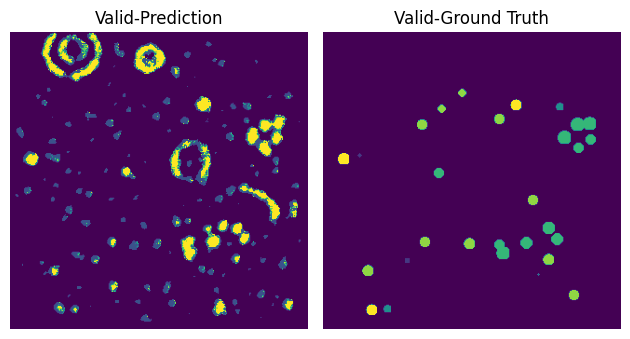

Valid-Epoch: 1, Loss: 0.9897556819791056:  92%|█████████▏| 184/200 [00:08<00:00, 22.28it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 1, VALID_SCORE: 0.12132445042607834


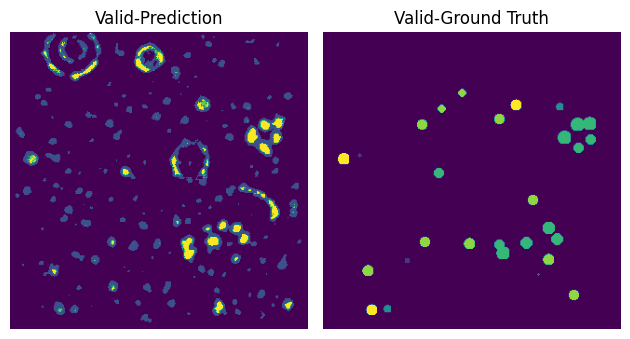

Valid-Epoch: 2, Loss: 0.8453615317728532:  92%|█████████▏| 184/200 [00:08<00:00, 22.57it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 2, VALID_SCORE: 0.18876433122252995


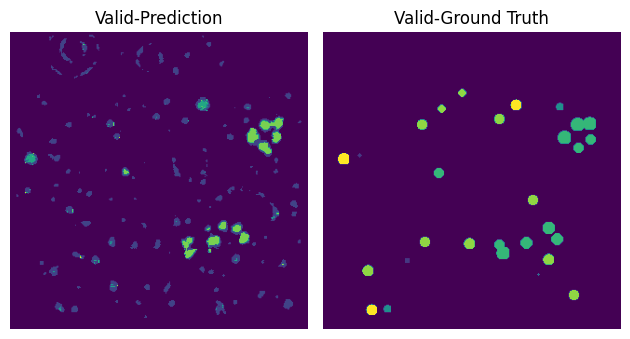

Valid-Epoch: 3, Loss: 1.0947126222106263:  92%|█████████▏| 184/200 [00:08<00:00, 22.61it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 3, VALID_SCORE: 0.11396400973036493


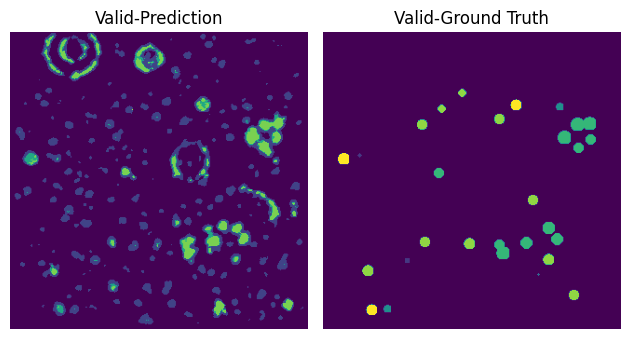

Valid-Epoch: 4, Loss: 0.9437244379508268:  92%|█████████▏| 184/200 [00:08<00:00, 22.66it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 4, VALID_SCORE: 0.09316874950233829


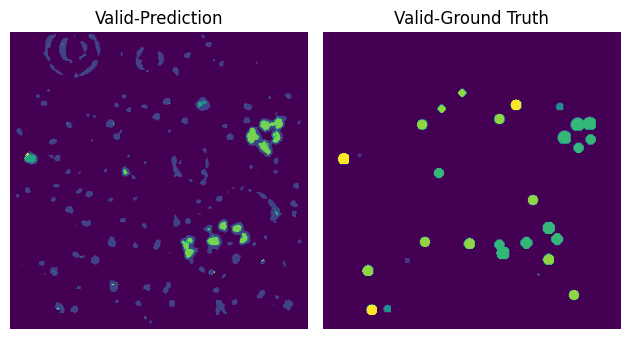

Valid-Epoch: 5, Loss: 0.5277048874919749:  92%|█████████▏| 184/200 [00:08<00:00, 22.84it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 5, VALID_SCORE: 0.09331524822585943


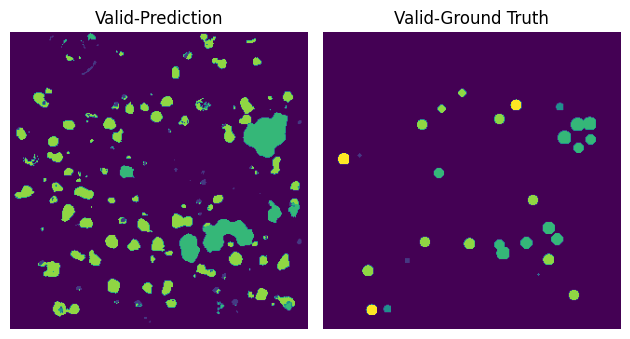

Valid-Epoch: 6, Loss: 1.0789088466933563:  92%|█████████▏| 184/200 [00:08<00:00, 22.30it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 6, VALID_SCORE: 0.04844122071169756


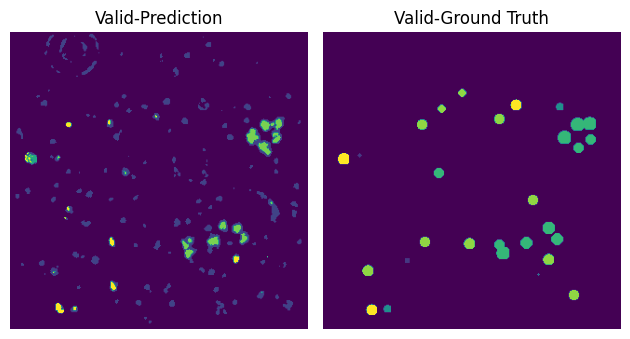

Valid-Epoch: 7, Loss: 1.9696240127694025:  92%|█████████▏| 184/200 [00:07<00:00, 23.19it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 7, VALID_SCORE: 0.024105517246102347


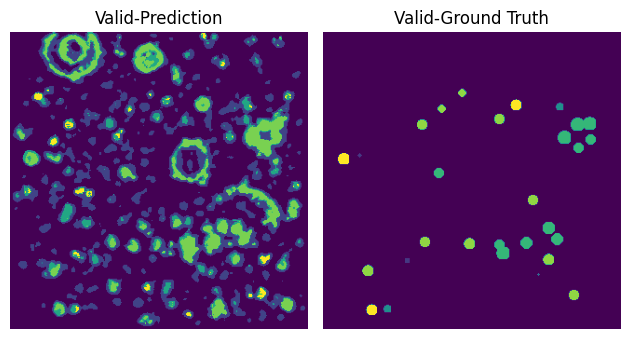

Valid-Epoch: 8, Loss: 0.9414871976933563:  92%|█████████▏| 184/200 [00:08<00:00, 22.81it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 8, VALID_SCORE: 0.046609990299490645


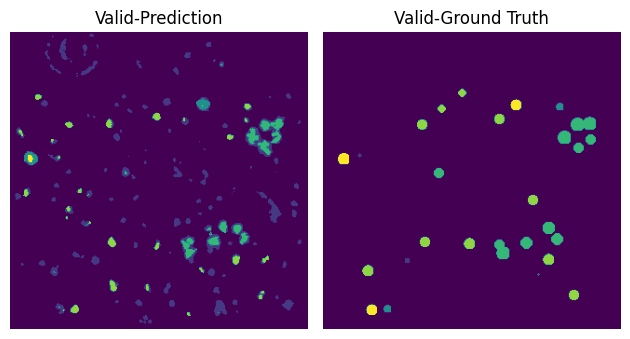

Valid-Epoch: 9, Loss: 0.8482388296296172:  92%|█████████▏| 184/200 [00:08<00:00, 22.91it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 9, VALID_SCORE: 0.03738605952071061


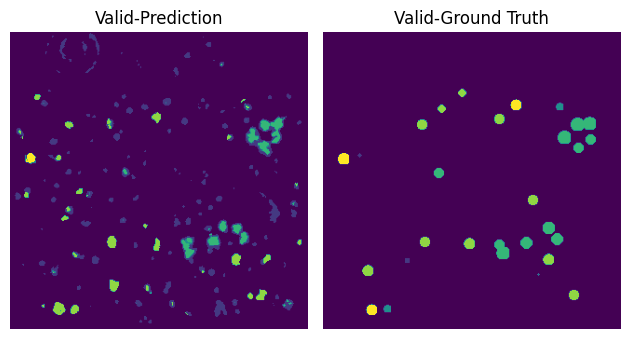

Valid-Epoch: 10, Loss: 1.2002939807008142:  92%|█████████▏| 184/200 [00:07<00:00, 23.17it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 10, VALID_SCORE: 0.034951569702168284


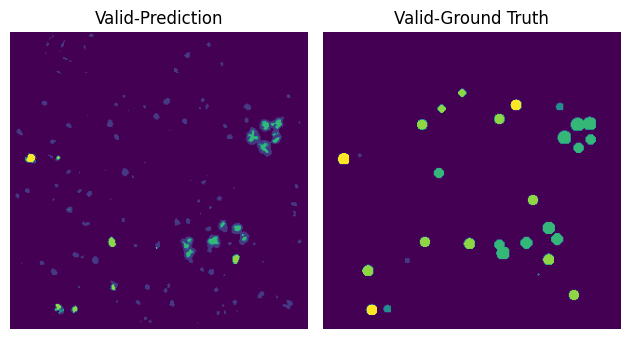

Valid-Epoch: 11, Loss: 1.1630672621211726:  92%|█████████▏| 184/200 [00:07<00:00, 23.21it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 11, VALID_SCORE: 0.03131224422866813


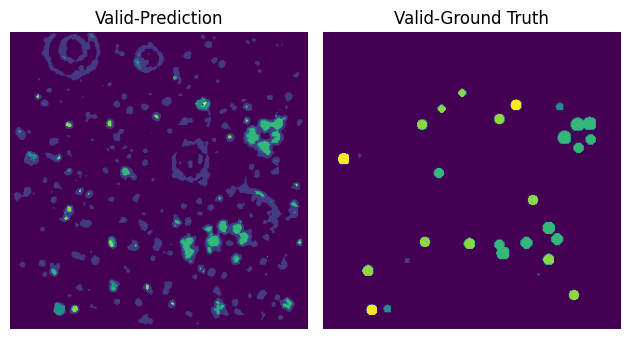

Valid-Epoch: 12, Loss: 1.0193692620479218:  92%|█████████▏| 184/200 [00:08<00:00, 22.58it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 12, VALID_SCORE: 0.04254034949633131


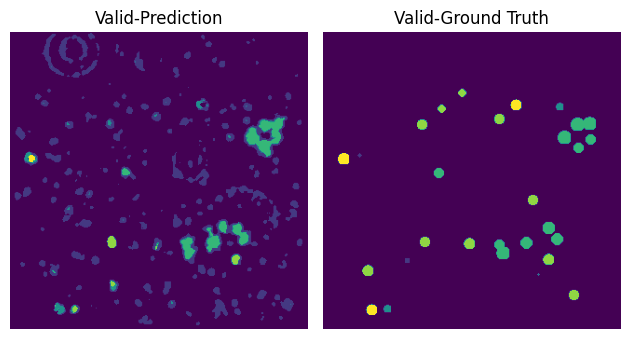

Valid-Epoch: 13, Loss: 2.0877419570460916:  92%|█████████▏| 184/200 [00:07<00:00, 23.20it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 13, VALID_SCORE: 0.008997062382634034


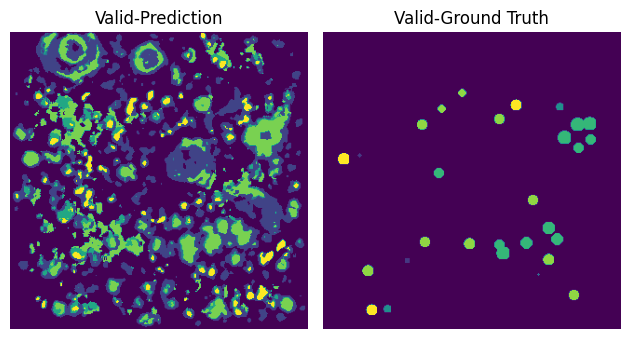

Valid-Epoch: 14, Loss: 1.4135573436708555:  92%|█████████▏| 184/200 [00:07<00:00, 23.10it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 14, VALID_SCORE: 0.02981326638007957


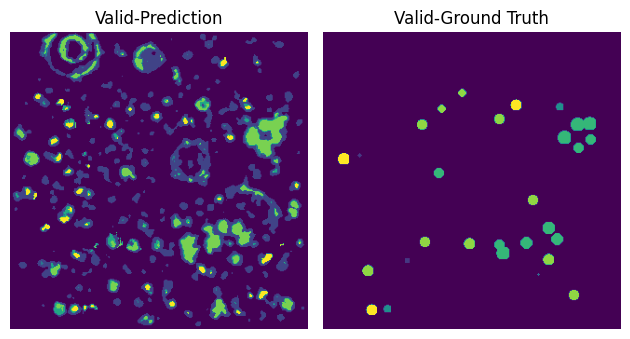

Valid-Epoch: 15, Loss: 1.0367776866566956:  92%|█████████▏| 184/200 [00:08<00:00, 20.78it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 15, VALID_SCORE: 0.03257294478186454


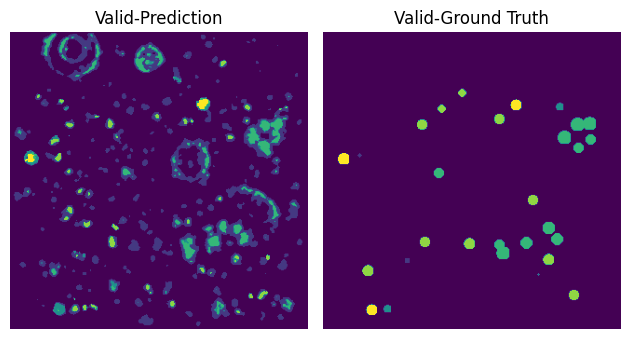

Valid-Epoch: 16, Loss: 1.1585443087792753:  92%|█████████▏| 184/200 [00:07<00:00, 23.22it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 16, VALID_SCORE: 0.024059234369154255


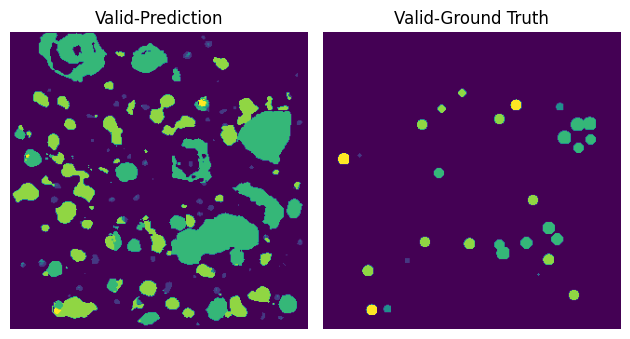

Valid-Epoch: 17, Loss: 0.39827892450367747:  92%|█████████▏| 184/200 [00:08<00:00, 21.71it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 17, VALID_SCORE: 0.021577450891280124


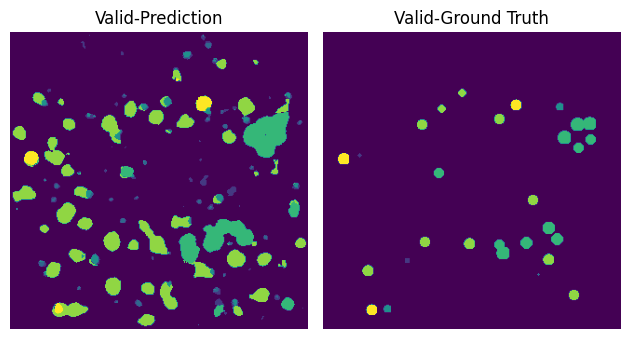

Train-Epoch: 18, Loss: 0.7949700203841318:  21%|██        | 167/800 [00:44<01:54,  5.51it/s]

In [ ]:
model = UNet_2D().to("cuda")
model.eval()


optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss(
    weight=torch.tensor([0.1, 0.1000, 14.4163, 14.1303, 1.0000, 2.2055, 4.4967]).to(
        "cuda"
    )
)
# criterion = DiceLoss()

best_model = None
best_score = 0
batch_size = 4

for epoch in range(100):
    train_loss = []
    valid_loss = []
    train_pred_tomogram = defaultdict(list)
    train_gt_tomogram = defaultdict(list)
    valid_pred_tomogram = defaultdict(list)
    valid_gt_tomogram = defaultdict(list)
    model.train()
    tq = tqdm(range(len(train_loader) * normalized_tomogram.shape[0] // batch_size))
    for data in train_loader:
        exp_name = data["exp_name"][0]
        tomogram = data["normalized_tomogram"]
        segmentation_map = data["segmentation_map"].long()

        for i in range(batch_size, tomogram.shape[1], batch_size):
            optimizer.zero_grad()
            from_, to_ = 0, tomogram.shape[1]
            random_index = random.sample(range(from_, to_), batch_size)
            input_ = tomogram[:, random_index]
            input_ = input_.permute(1, 0, 2, 3)  # (batch_size, 1, 160, 160)
            gt = segmentation_map[:, random_index].squeeze()  # (batch_size, 160, 160)

            input_, gt = aug(input_, gt)

            input_ = input_.to("cuda")
            gt = gt.to("cuda")
            output = model(input_)
            loss = criterion(output, gt)
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
            tq.set_description(f"Train-Epoch: {epoch}, Loss: {np.mean(train_loss)}")
            tq.update(1)

            for i in range(batch_size):
                train_pred_tomogram[exp_name].append(output.cpu().detach().numpy())
                train_gt_tomogram[exp_name].append(gt.cpu().detach().numpy())
    tq.close()

    ############################################# valid #############################################

    model.eval()
    tq = tqdm(range(len(valid_loader) * normalized_tomogram.shape[0]))
    for data in valid_loader:
        exp_name = data["exp_name"][0]
        tomogram = data["normalized_tomogram"].to("cuda")
        segmentation_map = data["segmentation_map"].to("cuda").long()

        for i in range(tomogram.shape[1]):
            input_ = tomogram[:, i].unsqueeze(0)
            gt = segmentation_map[:, i]

            output = model(input_)
            loss = criterion(output, gt)

            valid_loss.append(loss.item())
            tq.set_description(f"Valid-Epoch: {epoch}, Loss: {np.mean(valid_loss)}")
            tq.update(1)

            valid_pred_tomogram[exp_name].append(output.cpu().detach().numpy())
            valid_gt_tomogram[exp_name].append(gt.cpu().detach().numpy())
    tq.close()

    valid_score_ = visualize_epoch_results(
        valid_pred_tomogram,
        valid_gt_tomogram,
        sikii_dict=CFG.initial_sikii,
    )

    print(f"EPOCH: {epoch}, VALID_SCORE: {valid_score_}")

    if valid_score_ > best_score:
        best_score = valid_score_
        best_model = model
        torch.save(model.state_dict(), f"best_model.pth")

    # 可視化
    index = 50

    # plt.figure(figsize=(10, 5))

    # ax = plt.subplot(1, 4, 1)
    # ax.imshow(train_pred_tomogram[exp_name][index].argmax(0))
    # ax.set_title("Train-Prediction")
    # ax.axis("off")

    # ax = plt.subplot(1, 4, 2)
    # ax.imshow(train_gt_tomogram[exp_name][index])
    # ax.set_title("Train-Ground Truth")
    # ax.axis("off")

    ax = plt.subplot(1, 2, 1)
    ax.imshow(valid_pred_tomogram[exp_name][index].argmax(1).squeeze(0))
    ax.set_title("Valid-Prediction")
    ax.axis("off")

    ax = plt.subplot(1, 2, 2)
    ax.imshow(valid_gt_tomogram[exp_name][index].squeeze(0))
    ax.set_title("Valid-Ground Truth")
    ax.axis("off")

    plt.tight_layout()

    plt.show()

    # save_images(
    #     train_gt_tomogram=train_gt_tomogram,
    #     train_pred_tomogram=train_pred_tomogram,
    #     valid_gt_tomogram=valid_gt_tomogram,
    #     valid_pred_tomogram=valid_pred_tomogram,
    #     save_dir="images",
    #     epoch=epoch,
    # )

In [ ]:
# 可視化
index = 50

plt.figure(figsize=(10, 5))

# ax = plt.subplot(1, 4, 1)
# ax.imshow(train_pred_tomogram[exp_name][index].argmax(0))
# ax.set_title("Train-Prediction")
# ax.axis("off")

# ax = plt.subplot(1, 4, 2)
# ax.imshow(train_gt_tomogram[exp_name][index])
# ax.set_title("Train-Ground Truth")
# ax.axis("off")

ax = plt.subplot(1, 2, 1)
ax.imshow(valid_pred_tomogram[exp_name][index].argmax(1).squeeze(0))
ax.set_title("Valid-Prediction")
ax.axis("off")

ax = plt.subplot(1, 2, 2)
ax.imshow(valid_gt_tomogram[exp_name][index].squeeze(0))
ax.set_title("Valid-Ground Truth")
ax.axis("off")

plt.tight_layout()

plt.show()